In [1]:
import os
os.chdir('../..')

import matplotlib.pyplot as plt
import mplhep as hep

from coffea.util import load
from coffea.hist import plot

hep.style.use(hep.style.ROOT)

## Closure test
In the following, we are going to test that the histograms with the pile-up variations filled with different implementation (`v_09` and `v_10`) coincide.

In [2]:
filename_v09 = "/work/mmarcheg/PocketCoffea/output/test_pileup_variations_v09/output.coffea" # all ttHbb + tt_dilepton stats
filename_v10 = "/work/mmarcheg/PocketCoffea/output/test_pileup_variations_v10/output.coffea" # limit : 4
output_v09 = load(filename_v09)
output_v10 = load(filename_v10)
output_v09.keys()

dict_keys(['sumw', 'nevts_initial', 'nevts_presel', 'nevts_cat_SR', 'nevts_cat_CR', 'hist_muon_pt', 'hist_muon_eta', 'hist_muon_phi', 'hist_electron_pt', 'hist_electron_eta', 'hist_electron_phi', 'hist_jet_pt', 'hist_jet_eta', 'hist_jet_phi', 'hist_nmuon', 'hist_nelectron', 'hist_nlep', 'hist_njet', 'hist_nbjet'])

In [3]:
h = output_v09['hist_njet']
print(h.axes())
print(h.identifiers('cat'))

(<Cat (name=sample) instance at 0x7ff9b87cc2e0>, <Cat (name=cat) instance at 0x7ff9b875d520>, <Cat (name=year) instance at 0x7ff9bc03ea90>, <Bin (name=njet) instance at 0x7ff8ef9ebb20>, <Cat (name=pileup) instance at 0x7ff8ef9ba910>)
[<StringBin (CR) instance at 0x7ff9bc03ec40>, <StringBin (SR) instance at 0x7ff9b875d3a0>]


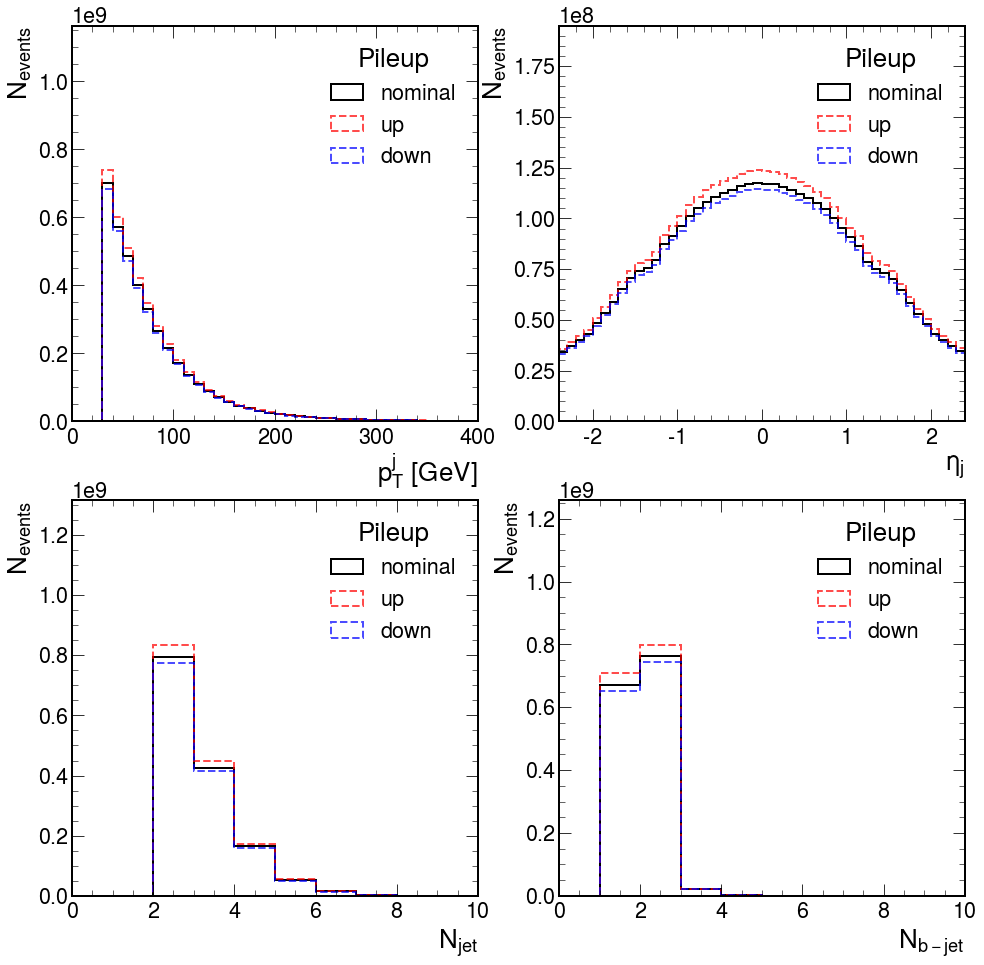

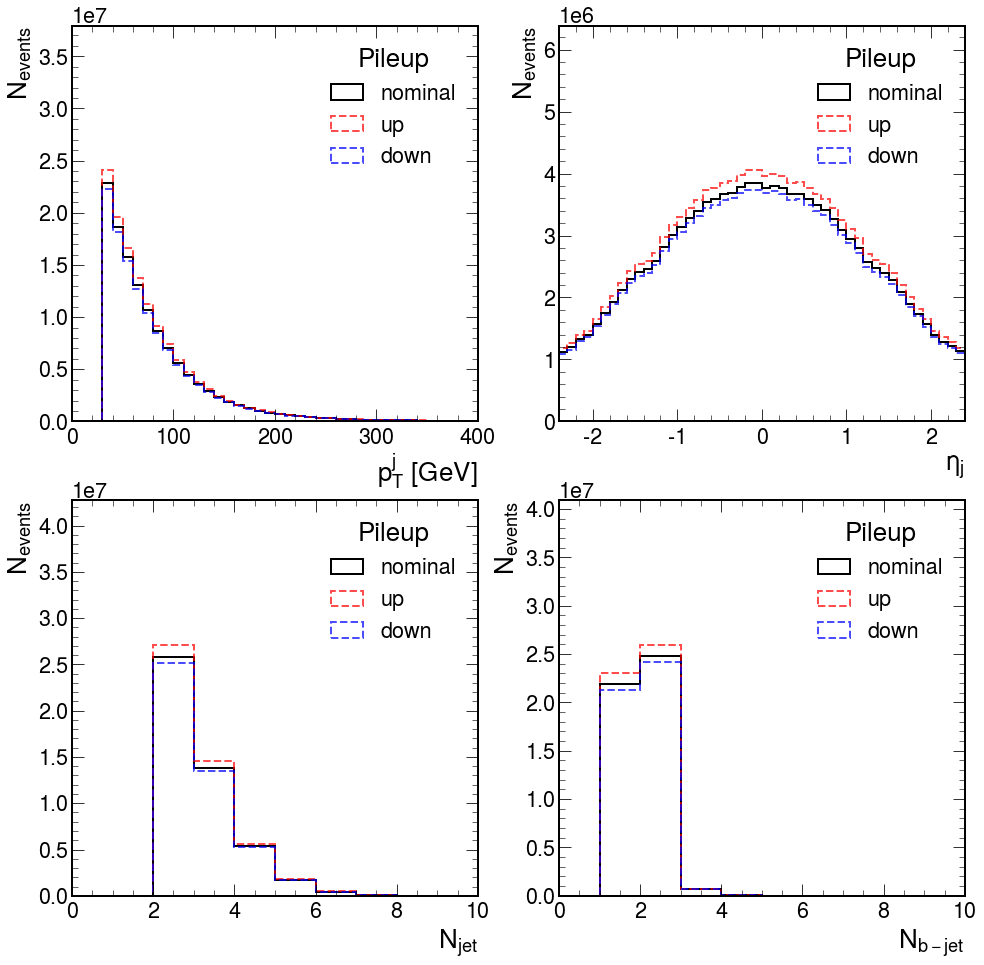

In [4]:
samples = [str(s) for s in h.identifiers('sample')]
cats    = [str(s) for s in h.identifiers('cat')]
categories_to_sum_over = ['cat', 'year', 'sample']

for version, output in zip(['v09', 'v10'], [output_v09, output_v10]):
    fig, axes = plt.subplots(2,2, figsize=[16,16])
    xlims = {
        'hist_jet_pt'  : (0,400),
        'hist_jet_eta' : (-2.4,2.4),
        'hist_njet'    : (0,10),
        'hist_nbjet'    : (0,10),
    }

    fill_opts = {
        'facecolor' : 'None',
        'edgecolor' : ['black', 'red', 'blue'],
        'linestyle' : ['-', '--', '--'],
        'linewidth' : 2,
        'alpha'     : [1, 0.7, 0.7]
    }

    order = ['nominal', 'up', 'down']

    for i, histname in enumerate(xlims.keys()):
        h = output[histname]
        plot.plot1d(h[(samples, 'SR', '2018')].sum(*categories_to_sum_over), ax=axes[int(i/2),i%2], fill_opts=fill_opts, order=order)
        axes[int(i/2),i%2].set_xlim(*xlims[histname])
        axes[int(i/2),i%2].set_ylim( (1.5*lim for lim in axes[int(i/2),i%2].get_ylim()) )
        axes[int(i/2),i%2].set_ylabel("$N_{events}$")
    plt.savefig(f"pileup_variations_{version}.png", dpi=300)